<a href="https://colab.research.google.com/github/Ezhil531/tmdb-movie-metadata/blob/main/Miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('ML project.csv')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,spoof,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00


In [ ]:
df.columns 

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.upper()
df.head()

,ID,IMDB_ID,POPULARITY,BUDGET,REVENUE,ORIGINAL_TITLE,CAST,HOMEPAGE,DIRECTOR,TAGLINE,KEYWORDS,OVERVIEW,RUNTIME,GENRES,PRODUCTION_COMPANIES,RELEASE_DATE,VOTE_COUNT,VOTE_AVERAGE,RELEASE_YEAR,BUDGET_ADJ,REVENUE_ADJ
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [ ]:
# WHICH ARE THE MOVIES WITH THE THIRD LOWEST AND THIRD HIGHEST BUDGET?
s = df.nlargest(3,'BUDGET')
s['ORIGINAL_TITLE']
#THIRD HIGHEST

2244                              The Warrior's Way
3375    Pirates of the Caribbean: On Stranger Tides
7387       Pirates of the Caribbean: At World's End
Name: ORIGINAL_TITLE, dtype: object

In [ ]:
p = df.nsmallest(3,'BUDGET')
p['ORIGINAL_TITLE']
#THIRD LOWEST

30          Mr. Holmes
36              Solace
72    Beyond the Reach
Name: ORIGINAL_TITLE, dtype: object

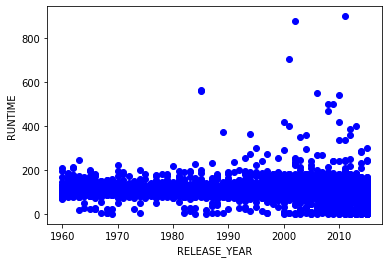

In [ ]:
# WHAT IS THE AVERAGE RUNTIME OF MOVIES IN THE YEAR 2006?
plt.scatter(df.RELEASE_YEAR,df.RUNTIME,color='blue') #scatter plot
plt.xlabel("RELEASE_YEAR")
plt.ylabel("RUNTIME")
plt.show()


In [ ]:
# WHICH ARE THE MOVIES WITH MOST AND LEAST EARNED REVENUE?
#LEAST EARNED REVENUE
b = df.query('REVENUE==0')
b[['ORIGINAL_TITLE','REVENUE']]

,ORIGINAL_TITLE,REVENUE
48,Wild Card,0
67,Survivor,0
74,Mythica: The Darkspore,0
75,Me and Earl and the Dying Girl,0
92,Mythica: The Necromancer,0
...,...,...
10861,The Endless Summer,0
10862,Grand Prix,0
10863,Beregis Avtomobilya,0
10864,"What's Up, Tiger Lily?",0


In [ ]:
# MOST EARNED REVENUE
c = df.query('REVENUE!=0')
c[['ORIGINAL_TITLE','REVENUE']]

,ORIGINAL_TITLE,REVENUE
0,Jurassic World,1513528810
1,Mad Max: Fury Road,378436354
2,Insurgent,295238201
3,Star Wars: The Force Awakens,2068178225
4,Furious 7,1506249360
...,...,...
10822,Who's Afraid of Virginia Woolf?,33736689
10828,Torn Curtain,13000000
10829,El Dorado,6000000
10835,The Sand Pebbles,20000000


In [ ]:
#WHAT IS THE MOST COMMON GENRE FOR VIN DIESEL AND EMMA WATSON MOVIES?
genres_and_count = {}
for i in range(df.shape[0]):
    genres = str(df['GENRES'].values[i]).split('|')
    for j in genres:
        try:
            count = genres_and_count[j]
            genres_and_count[j] = count + 1
        except:
            genres_and_count[j] = 1
        
genres_and_count

{'Action': 2385,
 'Adventure': 1471,
 'Animation': 699,
 'Comedy': 3793,
 'Crime': 1355,
 'Documentary': 520,
 'Drama': 4761,
 'Family': 1231,
 'Fantasy': 916,
 'Foreign': 188,
 'History': 334,
 'Horror': 1637,
 'Music': 408,
 'Mystery': 810,
 'Romance': 1712,
 'Science Fiction': 1230,
 'TV Movie': 167,
 'Thriller': 2908,
 'War': 270,
 'Western': 165,
 'nan': 23}